<a href="https://colab.research.google.com/github/parumahajan24/Data-Analytics-and-Machine-Learning-Labs-MIS-637/blob/main/hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 7: Decision Tree
### Due Saturday, March 25, 11:59 PM

This homework is based on the materials covered in week 6 and 7 about decision tree algorithms.

You will work with a dataset containing a bank's customer information. You will act as a Data scientist for the bank to build a model that will help the bank's marketing department to identify the potential customers who have a higher probability of purchasing a loan product.

The dataset contains the following attributes:
- ID: Customer ID
- Age: Customer’s age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (in thousand dollars)
- ZIP Code: Home Address ZIP code.
- Family: the Family size of the customer
- CCAvg: Average spending on credit cards per month (in thousand dollars)
- Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (in thousand dollars)
- Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities_Account: Does the customer have securities account with the bank?
- CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Do customers use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

Please use Python as the coding language. You are free to use existing Python libraries. Please make sure your codes can run successfully, no points will be given for a question if the code fails to run.

### Preparation: load dataset
Download the dataset 'bank_customer.csv' and store it in the same folder as this Jupyter notebook. Use the following codes to load the dataset.

In [76]:
import numpy as np
import pandas as pd

df = pd.read_csv('/bank_customer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


To simplify the following analysis, we drop 'ID', 'ZIP Code', 'Family', 'Mortgage' columns from the dataframe.

In [77]:
df = df.drop(['ID','ZIP Code','Family','Mortgage'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Personal Loan       5000 non-null   int64  
 6   Securities Account  5000 non-null   int64  
 7   CD Account          5000 non-null   int64  
 8   Online              5000 non-null   int64  
 9   CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 390.8 KB


### Q1. Understand the dataset (1 point)
From the output from `df.info()`, we observe that this dataset contains records on 5000 customers and there is no missing data. The dataset contains a mix of numerical and categorical attributes, and all categorical data are represented with numbers. Note: you do not need to consider the 4 columns that have been dropped.

1. Identify all categorical attributes, and use the proper command to report the number of unique values in each categorical column. (0.5 point)
2. Identify all numerical attributes, and use the proper command to report the range and quartile of each numerical column. (0.5 point)

 *Space reserved for writing explanation for Q1.1*
 Based on the type of data each attribute represent, I have identified Categorical attributes (discrete categories or labels) and Numerical attributes (continuous numerical values) as follows:

In [78]:
# Enter your code for Q1.1 here

# Categorical attributes
categorical_columns = ['Education', 'Personal Loan', 'Securities Account','CD Account','Online','CreditCard' ]

# Report the number of unique values in each categorical column
for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")


Column 'Education' has 3 unique values.
Column 'Personal Loan' has 2 unique values.
Column 'Securities Account' has 2 unique values.
Column 'CD Account' has 2 unique values.
Column 'Online' has 2 unique values.
Column 'CreditCard' has 2 unique values.


*Space reserved for writing explanation for Q1.2*


In [79]:
# Enter your code for Q1.2 here

# Numerical attributes
numerical_columns = ['Age', 'Experience', 'Income', 'CCAvg']

# Report range and quartiles of each numerical column
for col in numerical_columns:
    range = np.ptp(df[col])
    quartiles = df[col].quantile([0.25, 0.5, 0.75])
    print(f"Column '{col}': Range = {range}, Quartiles (25%, 50%, 75%) = {quartiles.values}")



Column 'Age': Range = 44, Quartiles (25%, 50%, 75%) = [35. 45. 55.]
Column 'Experience': Range = 46, Quartiles (25%, 50%, 75%) = [10. 20. 30.]
Column 'Income': Range = 216, Quartiles (25%, 50%, 75%) = [39. 64. 98.]
Column 'CCAvg': Range = 10.0, Quartiles (25%, 50%, 75%) = [0.7 1.5 2.5]


### Q2. Create separate arrays to store features and target label (2 point)
In this dataset, the target label is indicated in the column 'Personal Loan': a '1' value means the customer accepted a loan in the previous campaign, and a '0' values means the customer did not accept. We use all other columns as features to predict the classification in 'Personal Loan'.

You need to create the following arrays.
- X: stores all predictor variables
- y: stores all target label

For all numerical attributes, you need to encode them as categorical attributes based on the quartile. For example, for the 'Age' attribute, you need to encode it as a new attribute 'Age_cat':
- Age_cat = 0, if Age <= Q1, where Q1 is the first quartile (25 percent value among all ages)
- Age_cat = 1, if Age > Q1 and Age <= Q2, where Q2 is the second quartile (50 percent value among all ages)
- Age_cat = 2, if Age > Q2 and Age <= Q3, where Q3 is the third quartile (75 percent value among all ages)
- Age_cat = 3, if Age > Q3

1. Create y (0.5 point)
2. Create X and properly encode all numerical values (1.5 point) Note: after encoding, remember to drop the original numerical attributes. The shape of the generated X should be (5000,9).

*Space reserved for writing explanation for Q2*


In [80]:
# Enter your code for Q2.1 here

# Create target label, y
y = df['Personal Loan'].values

# print(y.shape)

In [81]:
# Enter your code for Q2.2 here

# Define quartiles for each numerical attribute - took from Q1.2
quartiles = {
    'Age': [35, 45, 55],
    'Experience': [10, 20, 30],
    'Income': [39, 64, 98],
    'CCAvg': [0.7, 1.5, 2.5]
}
# Encode numerical attributes as categorical attributes based on quartiles
for col, q_values in quartiles.items():
    df[f'{col}_cat'] = pd.cut(df[col], bins=[-np.inf, *q_values, np.inf], labels=False)

# drop the original numerical attributes.
X = df.drop(columns=numerical_columns + ['Personal Loan']).values

print(X.shape)


(5000, 9)


### Q3. Train and test a decision tree with 80/20 split (2 point)
You will now train a decision tree on the dataset.

1. Use the proper commands to split (X,y) into training set (80% of all data), and testing set (20% of all data). Use random_state=0 when creating the splits. (0.5 point)
2. Use the proper commands to fit a decision tree model on the training set with 'Gini impurity' as splitting criterion, and 'random_state=123' in `scikit-learn`. (1 point)
3. Use the proper commands to report the training and testing accuracy of the decision tree. (0.5 point)

*Space reserved for writing explanation for Q3*


In [82]:
# Enter your code for Q3.1 here

# split training-testing dataset
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
# Enter your code for Q3.2 here

from sklearn.tree import DecisionTreeClassifier
# create a decision tree classifier
dt0_gini = DecisionTreeClassifier(criterion='gini', random_state=123)

# fit the tree to training data
dt0_gini.fit(X_train1, y_train1)

DecisionTreeClassifier(random_state=123)

In [84]:
# Enter your code for Q3.3 here

# test the decision tree on testing data
y_pred_gini = dt0_gini.predict(X_test1)

# report testing accuracy
from sklearn.metrics import accuracy_score

print('Testing accuracy of this decision tree: {0:0.4f}'. format(accuracy_score(y_test1, y_pred_gini)))
print('Training accuracy of this decision tree: {0:0.4f}'. format(dt0_gini.score(X_train1, y_train1)))

Testing accuracy of this decision tree: 0.9660
Training accuracy of this decision tree: 0.9745


### Q4. Train and test a smaller decision tree (1 point)
In the previous question, we did not impose any restriction on the size of the decision tree. For interpretability, it is often desirable to have a smaller decision tree. You will next train a smaller decision tree, and observe its performance. The same training and testing sets will be used.

1. Use the proper commands to fit a decision tree with a maximum depth of 3 on the training set with 'Gini impurity' as splitting criterion, 'random_state=123'. (0.5 point)
2. Use the proper commands to report the training and testing accuracy of the new decision tree. (0.5 point)

*Space reserved for writing explanation for Q4*


In [85]:
# Enter your code for Q4.1 here
dt1_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=123,)
# fit the model
dt1_gini.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [86]:
# Enter your code for Q4.2 here

# test the decision tree on testing data
y_pred_gini1 = dt1_gini.predict(X_test1)

# report testing accuracy
from sklearn.metrics import accuracy_score

print('Testing accuracy of this decision tree: {0:0.4f}'. format(accuracy_score(y_test1, y_pred_gini1)))
print('Training accuracy of this decision tree: {0:0.4f}'. format(dt1_gini.score(X_train1, y_train1)))

Testing accuracy of this decision tree: 0.9480
Training accuracy of this decision tree: 0.9547


### Q5. Use cross validation to tune a smaller decision tree (2 point)
As we expect, restricting the size of the decision tree leads to a drop in accuracy. You will next use 5-fold cross validation on the training dataset to find the criterion and max_depth setup, which leads to the best validation accuracy, from the following range:
- criterion is either Gini impurity or Information gain
- max_depth is 2, 3 or 4

1. Use GridSearchCV function to perform the cross validation and report the best parameter setup. (1 point)
2. Train a new decision tree with the found best parameters on the same training data, then report training and testing accuracy of the new decision tree. (1 point)

*Space reserved for writing explanation for Q5*


In [87]:
# Enter your code for Q5.1 here
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4]
}

# Create the DecisionTreeClassifier model
dt_classifier = DecisionTreeClassifier(random_state=123)

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

In [88]:
# Enter your code for Q5.2 here

# Perform the grid search on the training data
grid_search.fit(X_train1, y_train1)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

# fit the train data with found best parameters
dt_classifier.fit(X_train1, y_train1)

# Evaluate the new DecisionTreeClassifier on the training data
y_train_pred_new = dt_classifier.predict(X_train1)
train_accuracy_new = accuracy_score(y_train1, y_train_pred_new)

# Evaluate the new DecisionTreeClassifier on the testing data
y_test_pred_new = dt_classifier.predict(X_test1)
test_accuracy_new = accuracy_score(y_test1, y_test_pred_new)

# Print the training and testing accuracies
print("Training Accuracy of new Decision Tree:", train_accuracy_new)
print("Testing Accuracy of new Decision tree:", test_accuracy_new)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4}
Training Accuracy of new Decision Tree: 0.96075
Testing Accuracy of new Decision tree: 0.954


### Q6. Visualize a decision tree, and make observations about decision rules (2 point)
You will now visualize the decision tree created in Q5. You can use either the `plot_tree` function or the `export_graphviz` function. For both functions, to increase readability, use the following code to set feature and class label names in the generated figure:
- `feature_names=X.columns, class_names=['Not Accept','Accept']`

1. Visualize the decision tree trained in Q5 (1 point)
2. Observe one decision rule from the generated tree (you can choose any rule based on your own tree), and report the support and confidence of the rule. (1 point)

*Space reserved for writing explanation for Q6.1*


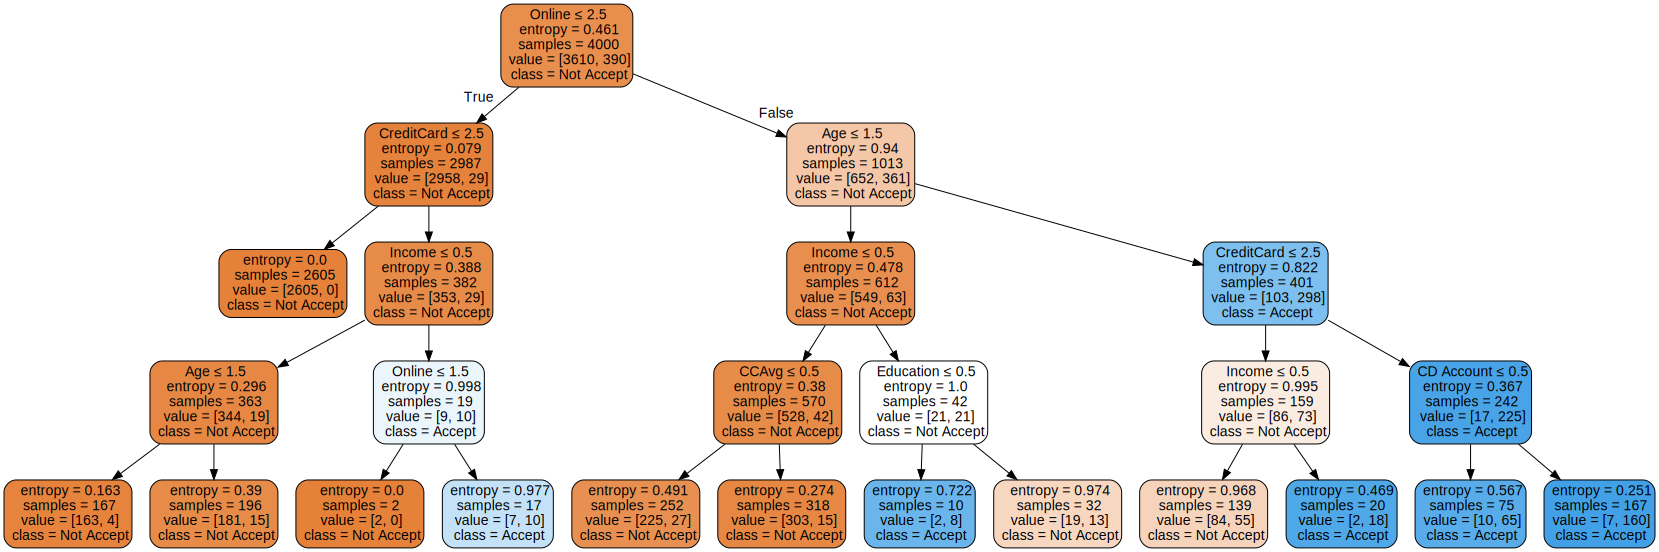

In [91]:
# Enter your code for Q6.1
# visualize tree
from sklearn import tree
import graphviz

X_df = pd.DataFrame(X, columns=['Age', 'Experience', 'Income', 'CCAvg', 'Education', 'Securities_Account', 'CD Account', 'Online', 'CreditCard'])
dot_data = tree.export_graphviz(dt_classifier,
                                feature_names=X_df.columns,
                                class_names=['Not Accept','Accept'],
                                filled=True, rounded=True,
                                special_characters=True)
# visualize tree
graph = graphviz.Source(dot_data)

graph

In [92]:
# Decision rule --> If Income is less than or equal to 0.5 and Education is less than or equal to 0.5, then the prediction is 'Not Accept'.
income_samples = 612
income_not_accept = 549
education_samples = 42
education_not_accept = 21

# support for the rule
support_count = min(income_samples, education_samples)

# confidence for the rule
correctly_classified_count = min(income_not_accept, education_not_accept)

# Calculate support and confidence
support = support_count / income_samples
confidence = correctly_classified_count / support_count if support_count > 0 else 0  # Avoid division by zero

# final support and confidence
print("Support for the rule:", support_count)
print("Confidence for the rule:", confidence)


Support for the rule: 42
Confidence for the rule: 0.5


*Space reserved for writing explanation for Q6.2*

